In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados

In [4]:
empregado_df = pd.read_csv('C:/Users/andy_/Documents/CursosUdemy - Arquivos/Ciência de Dados para Empresas e Finanças/Recursos Humanos/Bases de dados/Human_Resources.csv')

In [5]:
saidas_df = empregado_df[empregado_df['Attrition']==1]
continuidade_df = empregado_df[empregado_df['Attrition']==0]


In [7]:
temporario_cat = empregado_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
temporario_cat
temporario_cat = pd.DataFrame(temporario_cat)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
temporario_cat = onehotencoder.fit_transform(temporario_cat).toarray()
temporario_cat.shape
type(temporario_cat)
temporario_cat = pd.DataFrame(temporario_cat)
temporario_num = empregado_df[['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
temporario_num = pd.DataFrame(temporario_num)
temp_geral = pd.concat([temporario_cat,temporario_num], axis =1)
temp_geral
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(temp_geral)
y = empregado_df['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25)
X_train.shape, Y_train

((1102, 45),
 433      No
 952     Yes
 1219     No
 553      No
 178      No
        ... 
 773      No
 743      No
 557      No
 1385     No
 202      No
 Name: Attrition, Length: 1102, dtype: object)

In [ ]:
#Random Forest -> Árvores de decisão 
#Exemplo aposentadoria - Conjunto de algoritmos de ADecisão combinados baseados em atributos randômicos. 
#Combina os votos de diferentes árvores de decisão. 

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
forest = RandomForestClassifier(n_estimators = 50 )
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [12]:
y_pred = forest.predict(X_test)

In [13]:
y_pred


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No',

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8586956521739131

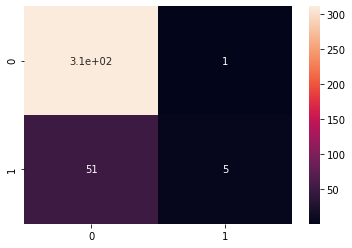

In [25]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, y_pred)
import seaborn as sns
sns.heatmap(CM, annot=True);

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      1.00      0.92       312
         Yes       0.83      0.09      0.16        56

    accuracy                           0.86       368
   macro avg       0.85      0.54      0.54       368
weighted avg       0.86      0.86      0.81       368

